In this notebook, we'll ask you to find numerical summaries for a certain set of data. You will use the values of what you find in this assignment to answer questions in the quiz that follows (we've noted where specific values will be requested in the quiz, so that you can record them.)

We'll also ask you to create some of the plots you have seen in previous lectures.   



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

path = "nhanes_2015_2016.csv"

In [2]:
# First, you must import the data from the path given above
df =pd.read_csv(path) # using pandas, read in the csv data found at the url defined by 'path'

In [7]:
# Next, look at the 'head' of our DataFrame 'df'. 

df.head(100)
df.shape
    
# If you can't remember a function, open a previous notebook or video as a reference 
# or use your favorite search engine to look for a solution

(5735, 28)

How many rows can you see when you don't put an argument into the previous method?   - top 5
How many rows can you see if you use an int as an argument?   -  ether specified integer rows or all
Can you use a float as an argument? - No

In [8]:
# Lets only consider the feature (or variable) 'BPXSY2'
bp = df['BPXSY2']

## Numerical Summaries
### Find the mean (note this for the quiz that follows)

In [12]:
# What is the mean of 'BPXSY2'?
bp_mean = np.mean(bp)
bp_mean

124.78301716350497

In [16]:
np.size(bp)
np.sum(bp)/np.size(bp)

120.43138622493461

In the method you used above, how are the rows of missing data treated?   
Are the excluded entirely? Are they counted as zeros? Something else? 
If you used a library function, try looking up the documentation using the code:
```
help(function_you_used)
```
For example:
```
help(np.sum)
```


#### .dropna()
To make sure we know that we aren't treating missing data in ways we don't want, lets go ahead and drop all the nans from our Series 'bp'

In [17]:
bp = bp.dropna()
bp.shape

(5535,)

### Find the:
* Median
* Max
* Min
* Standard deviation
* Variance


You can implement any of these from base python (that is, without any of the imported packages), but there are simple and intuitively named functions in the numpy library for all of these. You could also use the fact that 'bp' is not just a list, but is a pandas.Series. You can find pandas.Series attributes and methods [here](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.html)

A large part of programming is being able to find the functions you need and to understand the documentation formatting so that you can implement the code yourself, so we highly encourage you to search the internet whenever you are unsure! 

### Example: 
Find the difference of an element in 'bp' compared with the previous element in 'bp'.

In [20]:
# Using the fact that 'bp' is a pd.Series object, can use the pd.Series method diff()
# call this method by: pd.Series.diff()
diff_by_series_method = bp.diff() 
print(diff_by_series_method)
# note that this returns a pd.Series object, that is, it had an index associated with it
diff_by_series_method.values # only want to see the values, not the index and values

0        NaN
1       16.0
2       -8.0
3        2.0
4      -20.0
5        8.0
6      -10.0
7        2.0
9       66.0
10     -30.0
11     -42.0
12      -4.0
13      12.0
14      20.0
15      10.0
16     -44.0
17       6.0
18      36.0
19     -18.0
20     -20.0
21      40.0
22     -14.0
23     -22.0
24      22.0
25     -22.0
26      14.0
27      12.0
28       4.0
29     -16.0
30      24.0
        ... 
5703    66.0
5704   -42.0
5705    32.0
5706   -36.0
5707     0.0
5708   -32.0
5709    26.0
5710     8.0
5711     6.0
5712   -34.0
5713     8.0
5714    52.0
5715   -40.0
5717   -14.0
5718     8.0
5720    -2.0
5721    -4.0
5722    -4.0
5723    26.0
5724   -14.0
5725   -10.0
5726    16.0
5727    38.0
5728   -48.0
5729    -6.0
5730     0.0
5731     4.0
5732    30.0
5733   -40.0
5734     8.0
Name: BPXSY2, Length: 5535, dtype: float64


array([ nan,  16.,  -8., ...,  30., -40.,   8.])

In [21]:
# Now use the numpy library instead to find the same values
# np.diff(array)
diff_by_np_method = np.diff(bp)
diff_by_np_method
# note that this returns an 'numpy.ndarray', which has no index associated with it, and therefore ignores
# the nan we get by the Series method

array([ 16.,  -8.,   2., ...,  30., -40.,   8.])

In [22]:
# We could also implement this ourselves with some looping
diff_by_me = [] # create an empty list
for i in range(len(bp.values)-1): # iterate through the index values of bp
    diff = bp.values[i+1] - bp.values[i] # find the difference between an element and the previous element
    diff_by_me.append(diff) # append to out list
np.array(diff_by_me) # format as an np.array

array([ 16.,  -8.,   2., ...,  30., -40.,   8.])

### Your turn (note these values for the quiz that follows)

In [23]:
bp_median = np.median(bp)
bp_median

122.0

In [24]:
bp_max = np.max(bp)
bp_max

238.0

In [25]:
bp_min = np.min(bp)
bp_min

84.0

In [26]:
bp_std = np.std(bp)
bp_std

18.525338021233786

In [27]:
bp_var = np.var(bp)
bp_var

343.1881488009701

### How to find the interquartile range (note this value for the quiz that follows)
This time we need to use the scipy.stats library that we imported above under the name 'stats'

In [28]:
bp_iqr = stats.iqr(bp) 
bp_iqr

22.0

## Visualizing the data
Next we'll use what you have learned from the *Tables, Histograms, Boxplots in Python* video

In [29]:
# use the Series.describe() method to see some descriptive statistics of our Series 'bp'
bp_descriptive_stats = bp.describe()
bp_descriptive_stats

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

In [0]:
# Make a histogram of our 'bp' data using the seaborn library we imported as 'sns'
sns.

Is your histogram labeled and does it have a title?
If not, try appending 
```
.set(title='your_title', xlabel='your_x_label', ylabel='your_y_label')
```
or just
```
.set(title='your_title')
```
to your graphing function

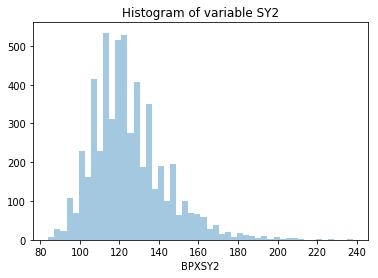

In [30]:
# Make a boxplot of our 'bp' data using the seaborn library. Make sure it has a title and labels!
# Plot a histogram of the total bill
sns.distplot(bp, kde = False).set_title("Histogram of variable SY2")
plt.show()

In [31]:
sns.hist(bp).set_title("Histogram of variable SY2")
plt.show()

AttributeError: module 'seaborn' has no attribute 'hist'